# How much did the $>50$ keV electrons contribute to the atmospheric energy flux?

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.colors
import numpy as np

import pad

In [ ]:
time_range = ('2022-09-04T04:18:00', '2022-09-04T04:23:00')
kev_erg_factor = 1.6E-9  # The conversion factor from KeV to ergs.
precipitation_solid_angle = 2*np.pi

In [ ]:
pad_obj_eflux = pad.EPD_PAD(
    'a', time_range, start_pa=0, min_counts=None, accumulate=1, spin_time_tol=(2.5, 12),
    lc_exclusion_angle=10, nflux=False
)

C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:393: UserWarning: The BLC/DLC ratios are all NaNs. This could be due to the lc_exclusion_angle excluding all pitch angles sampled.
  warnings.warn(
C:\Users\shumkms1\Documents\research\pad\src\pad\analysis\_pad.py:400: RuntimeWarning: invalid value encountered in divide
  (self.blc_std/self.blc)**2 +


## Plot the BLC and ABLC energy fluxes
Let's compare the amount of energy flux that disspiated in the atmosphere vs made it back out?

C:\Users\shumkms1\AppData\Local\Temp\ipykernel_39128\3583179850.py:19: RuntimeWarning: divide by zero encountered in divide
  pad_obj_eflux.blc.T/pad_obj_eflux.ablc.T,
C:\Users\shumkms1\AppData\Local\Temp\ipykernel_39128\3583179850.py:19: RuntimeWarning: invalid value encountered in divide
  pad_obj_eflux.blc.T/pad_obj_eflux.ablc.T,


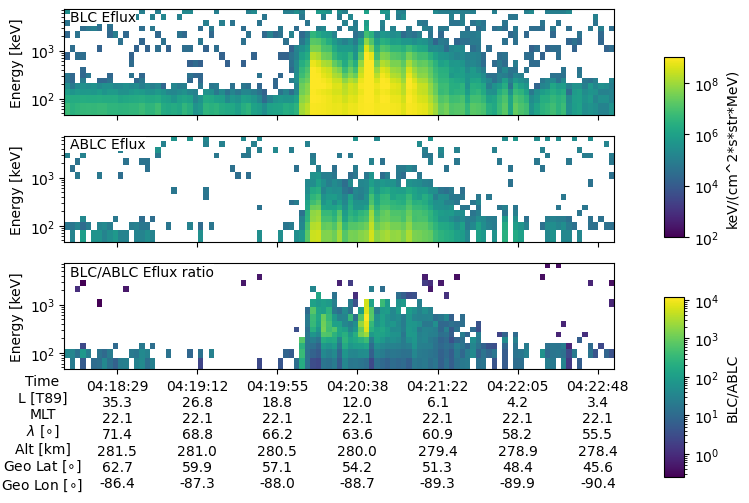

In [38]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
p = ax[0].pcolormesh(
            pad_obj_eflux.pad.time, 
            pad_obj_eflux.energy, 
            pad_obj_eflux.blc.T,
            shading='nearest',
            norm=matplotlib.colors.LogNorm(vmin=1E2, vmax=1E9)
            )
p2 = ax[1].pcolormesh(
            pad_obj_eflux.pad.time, 
            pad_obj_eflux.energy, 
            pad_obj_eflux.ablc.T,
            shading='nearest',
            norm=matplotlib.colors.LogNorm(vmin=1E2, vmax=1E9)
            )
p3 = ax[2].pcolormesh(
            pad_obj_eflux.pad.time, 
            pad_obj_eflux.energy, 
            pad_obj_eflux.blc.T/pad_obj_eflux.ablc.T,
            shading='nearest',
            norm=matplotlib.colors.LogNorm()
            )

pad_obj_eflux.plot_position(ax[-1])

labels = ('BLC Eflux', 'ABLC Eflux', 'BLC/ABLC Eflux ratio')
for ax_i, label in zip(ax, labels):
    ax_i.set_yscale('log')
    ax_i.set_ylabel('Energy [keV]')
    _text = ax_i.text(0.01, 0.99, label, transform=ax_i.transAxes, va='top')
    _text.set_bbox(dict(facecolor='white', linewidth=0, pad=0.1, edgecolor='k'))

fig.subplots_adjust(left=0.25, right=0.8)
cbar_ax0 = fig.add_axes([0.85, 0.5, 0.02, 0.3])
cbar_ax1 = fig.add_axes([0.85, 0.1, 0.02, 0.3])
fig.colorbar(p, cax=cbar_ax0, label=pad_obj_eflux._flux_units)
fig.colorbar(p3, cax=cbar_ax1, label='BLC/ABLC')

ax[-1].xaxis.set_major_locator(plt.MaxNLocator(7))
ax[-1].xaxis.set_label_coords(-0.04, -0.007*7)
ax[-1].xaxis.label.set_size(10)


$>10$x of the $>50$ keV energy flux was dissipated in the atmosphere. In other words, less than 10% of the energy flux made it back out.

## What was the $>50 keV$ energy flux that ELFIN observed

In [58]:
energy_widths_mev = (pad_obj_eflux.energy_widths[:, 1]-pad_obj_eflux.energy_widths[:, 0])/1E3
eflux_ergs = kev_erg_factor*precipitation_solid_angle*(pad_obj_eflux.blc - pad_obj_eflux.ablc)*energy_widths_mev
relativistic_eflux = np.nansum(eflux_ergs, axis=1)

C:\Users\shumkms1\AppData\Local\Temp\ipykernel_39128\2665303501.py:3: RuntimeWarning: invalid value encountered in log10
  bx[1].plot(pad_obj_eflux.pad.time, np.log10(relativistic_eflux))
C:\Users\shumkms1\AppData\Local\Temp\ipykernel_39128\2665303501.py:4: RuntimeWarning: invalid value encountered in log10
  bx[2].plot(pad_obj_eflux.pad.time, np.log10(relativistic_eflux))


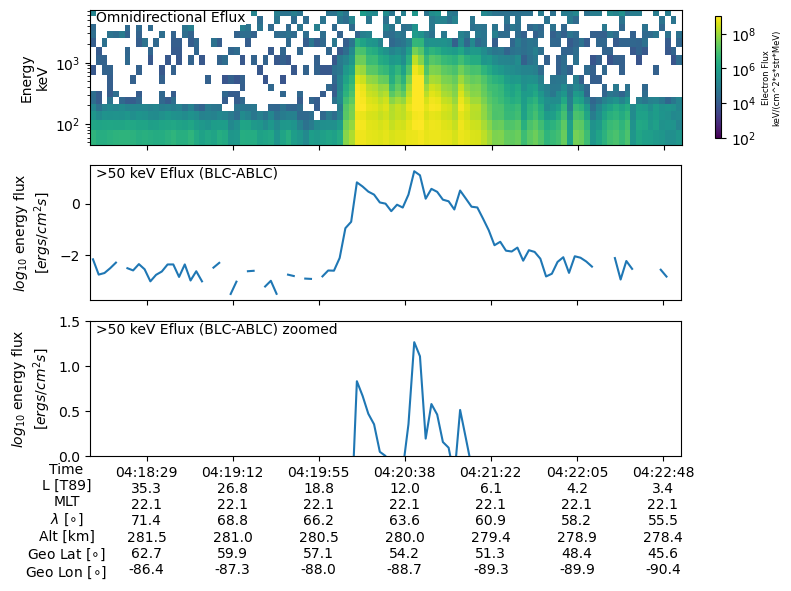

In [74]:
fig, bx = plt.subplots(3, 1, sharex=True, figsize=(8, 6))
pad_obj_eflux.plot_omni(bx[0], labels=True, colorbar=True, vmin=1E2, vmax=1E9, pretty_plot=False, fraction=0.05)
bx[1].plot(pad_obj_eflux.pad.time, np.log10(relativistic_eflux))
bx[2].plot(pad_obj_eflux.pad.time, np.log10(relativistic_eflux))
pad_obj_eflux.plot_position(bx[-1])
bx[-1].xaxis.set_major_locator(plt.MaxNLocator(7))
bx[-1].xaxis.set_label_coords(-0.04, -0.007*7)
bx[-1].xaxis.label.set_size(10)

for bx_i in bx[[1, 2]]:
    bx_i.set_ylabel(f'$log_{{10}}$ energy flux\n$[ergs/cm^{{2}}s]$')
    divider = make_axes_locatable(bx_i)
    cax = divider.append_axes("right", size="10%", pad=0.08)
    cax.remove()
bx[-1].set_ylim(0, None)

labels = ('Omnidirectional Eflux', '>50 keV Eflux (BLC-ABLC)', '>50 keV Eflux (BLC-ABLC) zoomed')
for ax_i, label in zip(bx, labels):
    _text = ax_i.text(0.01, 0.99, label, transform=ax_i.transAxes, va='top')
    _text.set_bbox(dict(facecolor='white', linewidth=0, pad=0.1, edgecolor='k'))
plt.tight_layout()

While the plasma sheet energy flux was very low, the IB and radiation belt precipitation contibuted between 1-13 ergs/(cm^2 s). This is not too different from the [Gabrielse+2021](https://doi.org/10.3389/fphy.2021.744298) results (the greem stuff). However, our results are harder to compare with [Newell+2009](https://doi.org/10.1029/2009JA014326), but Newell's bottom panel of Fig. 5 shows a higher diffuse aurora energy flux during active times.

![Example energy flux estimate from Gabrielse+2021 ](plots/gabrielse_2021_eflux_example.png)

How does the $>50$ keV energy flux compare to the auroral energy flux? This seems like a tossup.